# Simple Linear Regresstion


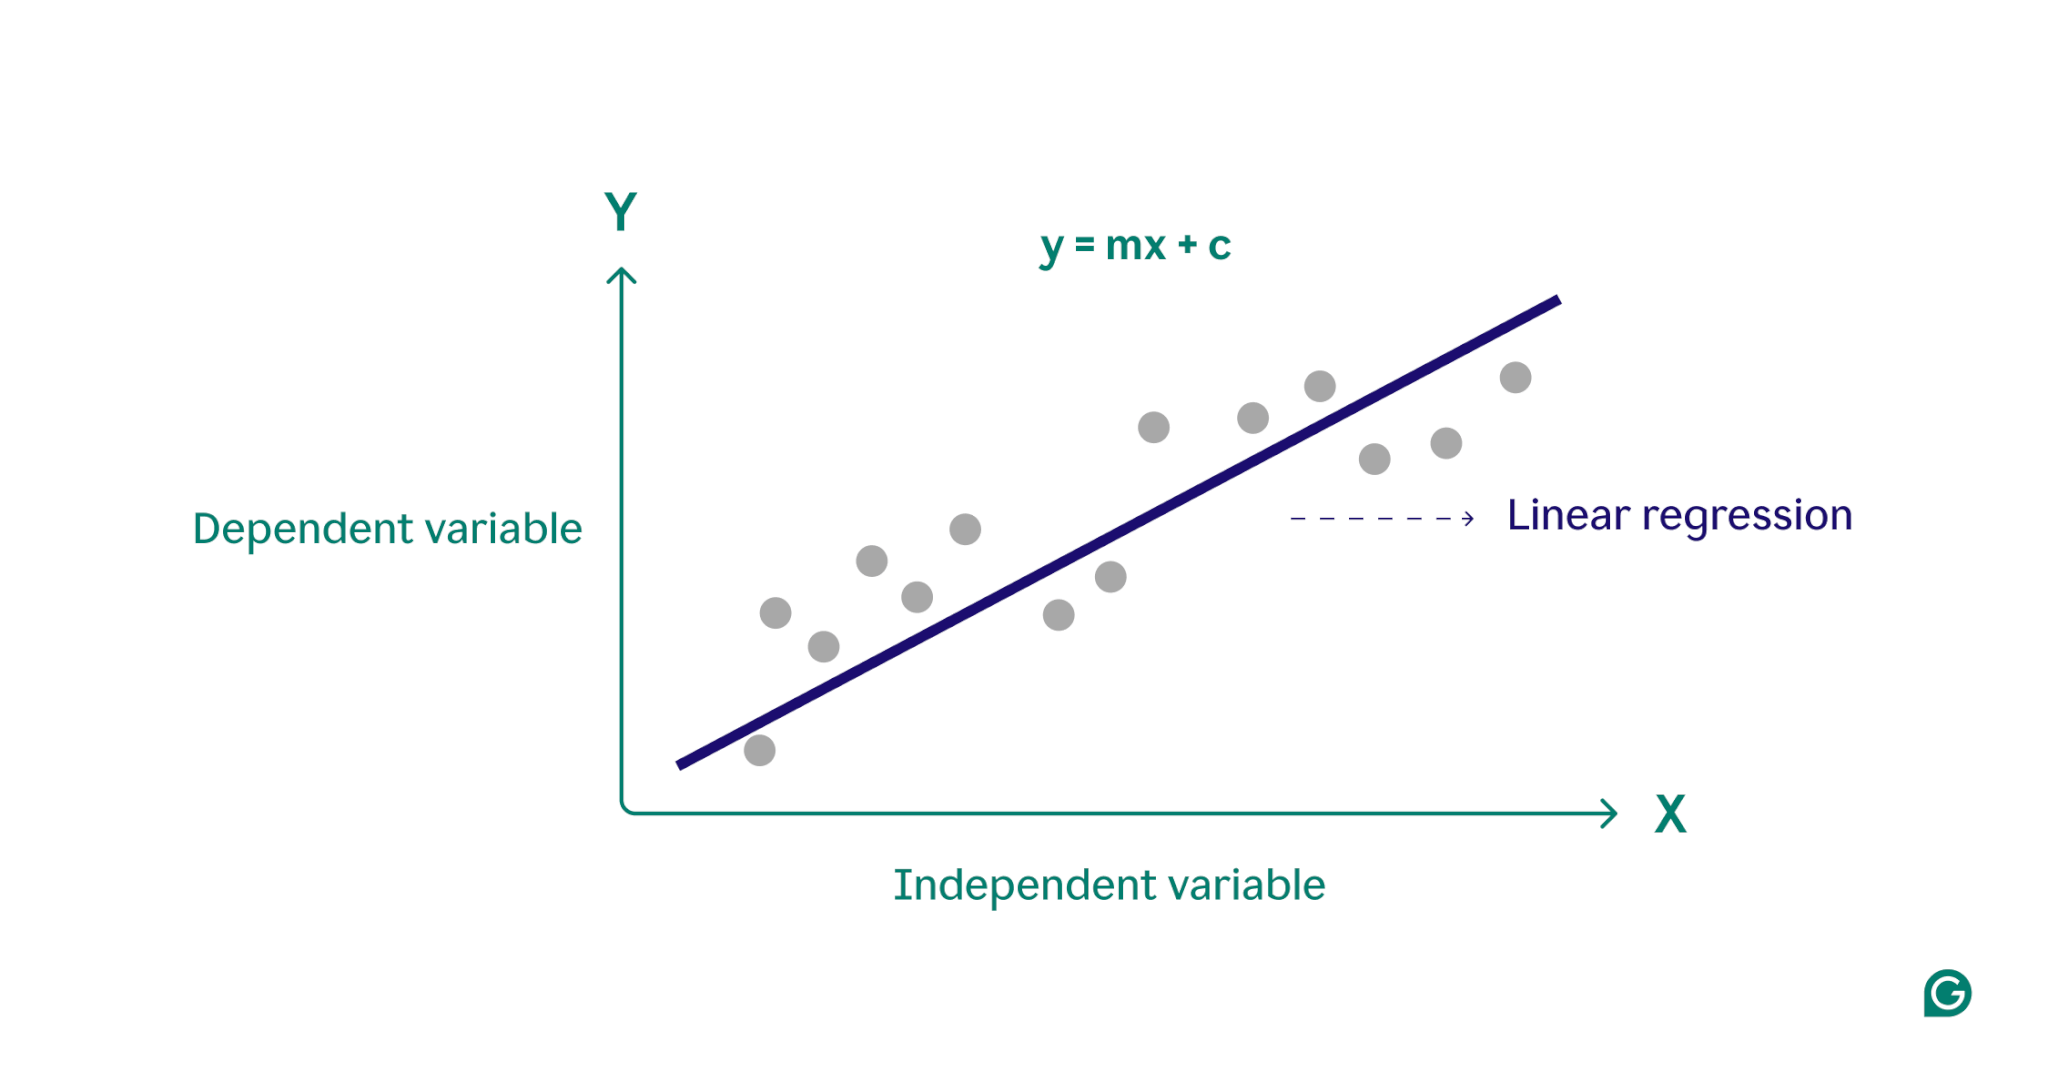
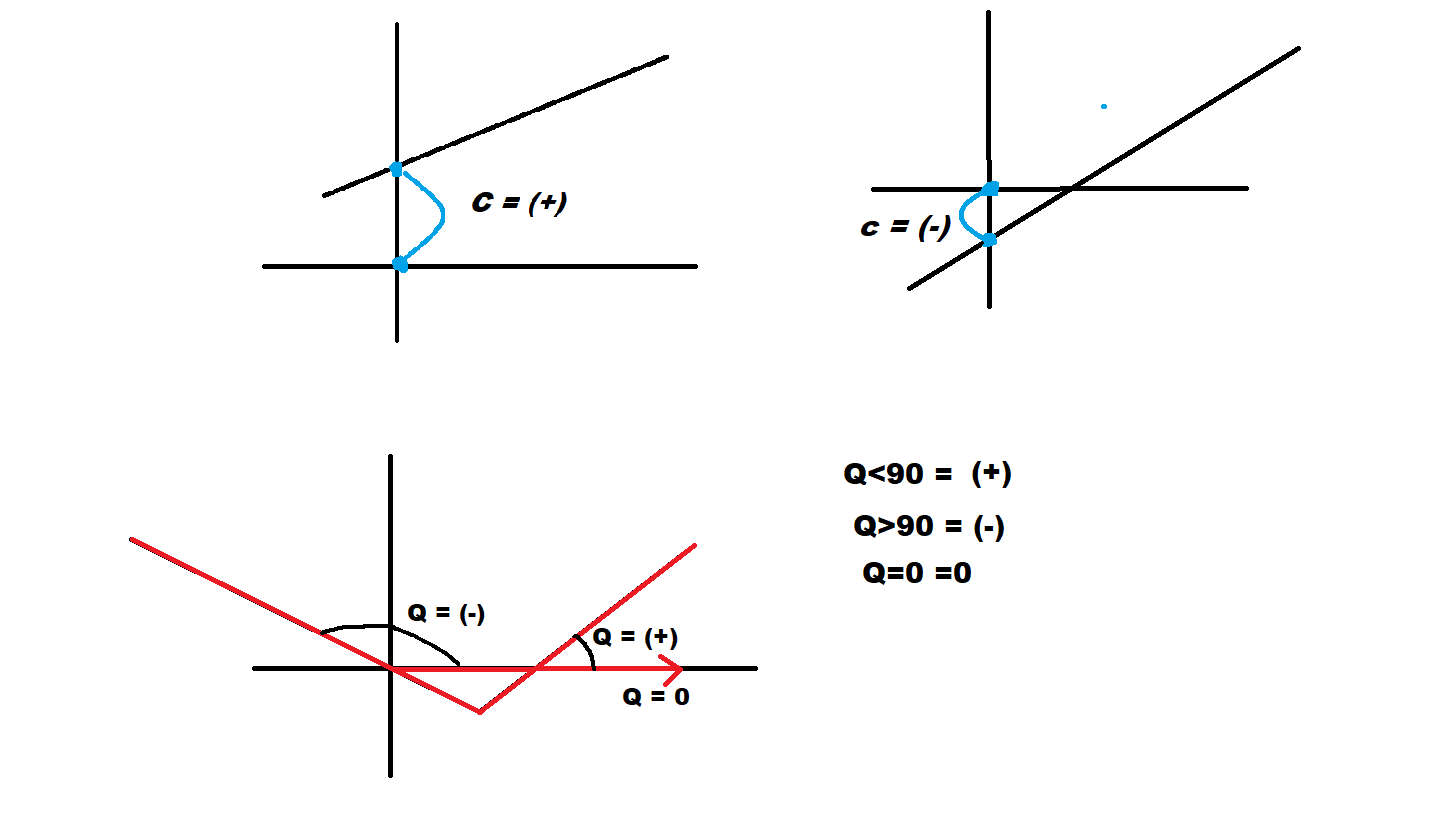

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
dataset = pd.read_csv(r"C:\Users\My\Downloads\placement.csv")
dataset.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [11]:
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

In [12]:
x = dataset[["cgpa"]]           #  (X always 2D )
y = dataset["package"]

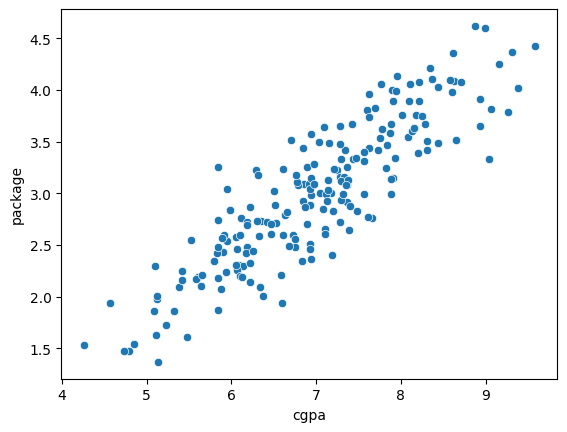

In [13]:
sns.scatterplot(x="cgpa",y="package",data=dataset)
plt.show()

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)  # for high accurecy change the random_state value

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Training Process
# linear regression (y=m*x+c)
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# (m)value
lr.coef_

array([0.57111357])

In [18]:
# (c)value
lr.intercept_

-0.9998951779221357

In [19]:
dataset.head(1)

,cgpa,package
0,6.89,3.26


In [20]:
# predict Model
lr.predict([[6.89]])

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.93507732])

In [21]:
# Model Accurecy
lr.score(x_test,y_test)*100

77.74721122516276

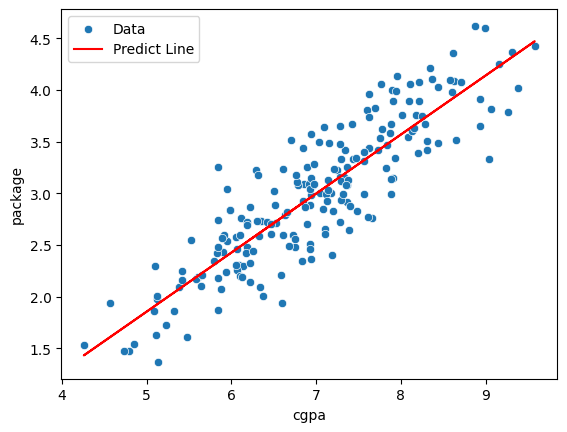

In [22]:
sns.scatterplot(x="cgpa",y="package",data=dataset)
plt.plot(dataset['cgpa'],lr.predict(x),c="red")
plt.legend(["Data","Predict Line"])
plt.show()

# Multiple Liner Regrassion
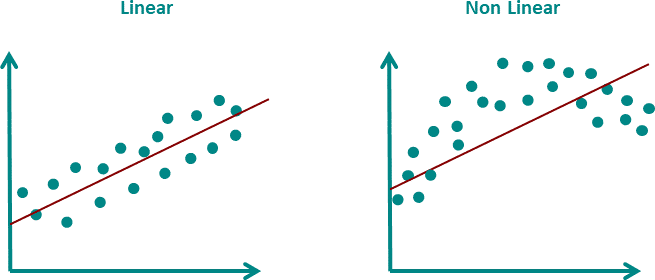

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dataset = pd.read_csv(r"C:\Users\My\Downloads\EmployeeText.csv")
dataset.head()

,Salary,Age,Experience
0,"32,368",42,3
1,"53,174",54,10
2,"52,722",47,10
3,"53,423",47,1
4,"50,602",44,5


In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Salary        71 non-null     object
 1   Age           71 non-null     int64 
 2     Experience  71 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.8+ KB


In [26]:
# salar is oobject
# object to int64
# Remove commas and convert to int64
dataset['Salary'] = dataset['Salary'].str.replace(',', '').astype('int64')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Salary        71 non-null     int64
 1   Age           71 non-null     int64
 2     Experience  71 non-null     int64
dtypes: int64(3)
memory usage: 1.8 KB


In [27]:
dataset.shape

(71, 3)

In [28]:
dataset.isnull().sum()

Salary          0
Age             0
  Experience    0
dtype: int64

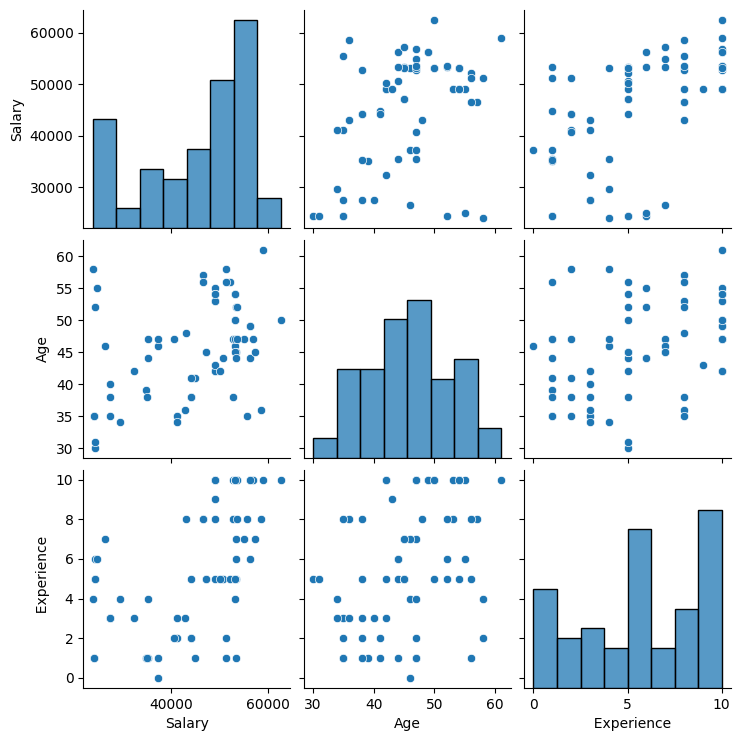

In [29]:
# chack linearity
sns.pairplot(data=dataset)
plt.show()
# Linearity is not present so that shouldn't be Linear Regression

In [30]:
x = dataset.iloc[:,:-1]
y = dataset["Salary"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
# Training Process
# linear regression (y=m1*x1+m2*x2+c)
lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
# (m)value
lr.coef_

array([ 1.00000000e+00, -2.11995978e-15])

In [36]:
# (c)value
lr.intercept_

7.275957614183426e-12

In [37]:
lr.predict(x_test)

array([62530., 32368., 51237., 50602., 24352., 53174., 53174., 44183.,
       49033., 56294., 27525., 23975., 26491., 49033., 27525., 41188.,
       53429., 49033.])

In [38]:
lr.score(x_test,y_test)

1.0

# Polynomial Regression

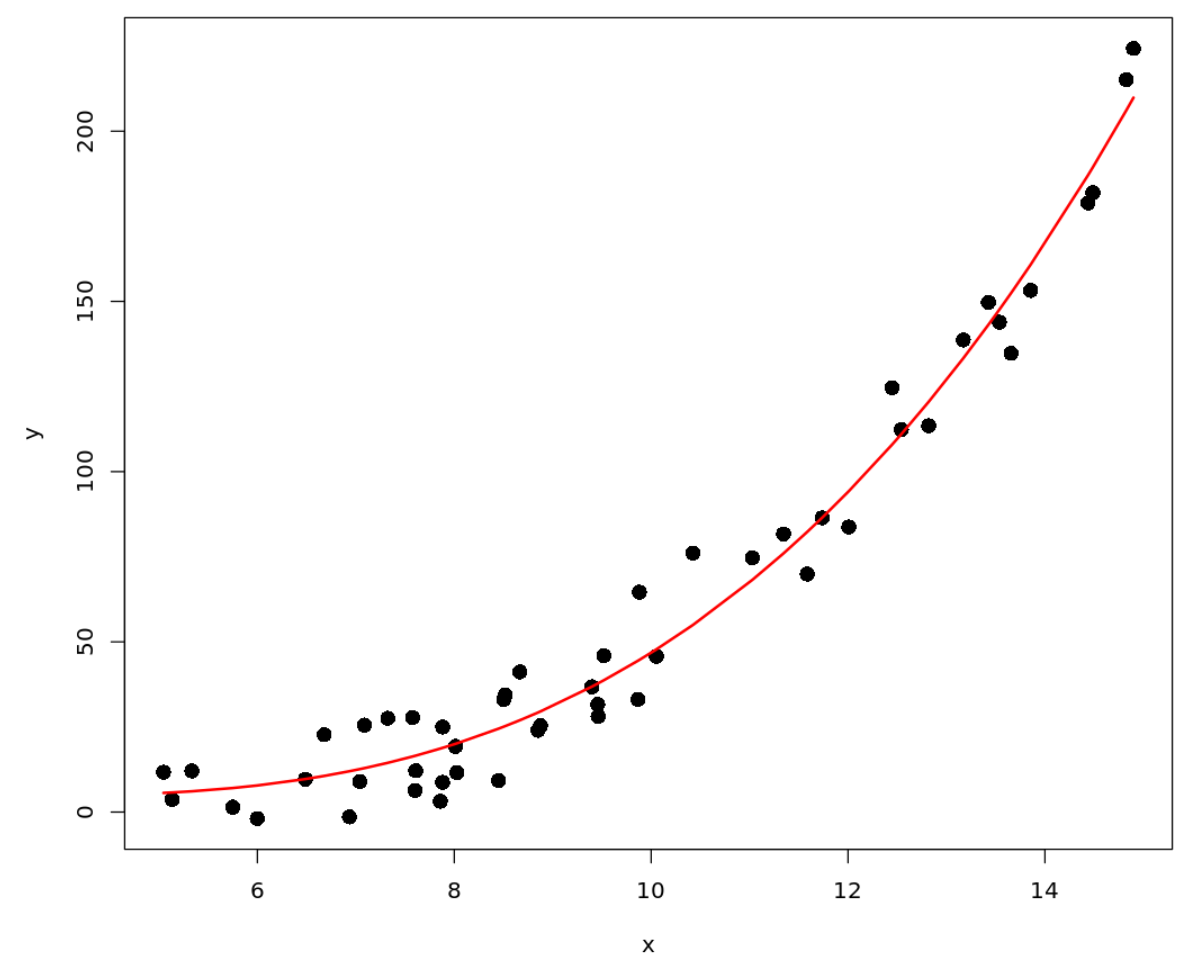

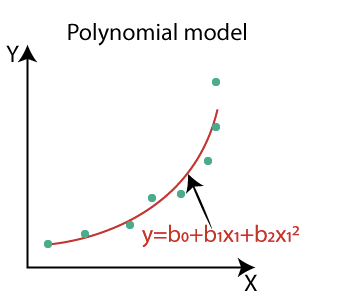 

In [39]:
import pandas as pd 
import matplotlib.pyplot as plt

In [40]:
dataset = pd.read_csv(r"C:\Users\My\Downloads\Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [47]:
# chack correlation
dataset[["Level","Salary"]].corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


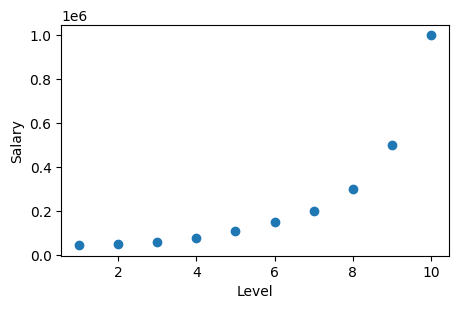

In [56]:
plt.figure(figsize=[5,3])
plt.scatter(dataset["Level"],dataset["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [223]:
x =dataset[["Level"]]
y =dataset[["Salary"]]

In [224]:
from sklearn.preprocessing import PolynomialFeatures

In [225]:
pf = PolynomialFeatures(degree=5)             # degree mean power x^3 [x^2_degree=2, x^4_degree=4 ....]
pf.fit(x)
x = pf.transform(x)

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [228]:
from sklearn.linear_model import LinearRegression

In [229]:
# Training Process
# polynomial regression (y=m1*x1 + m2*x1^2 + m3*x1^3 + m4*x1^4 +...+c)

lr = LinearRegression()
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [230]:
# (m) value
lr.coef_

array([[     0.        , 116355.39328243, -72923.53182752,
         21032.71171424,  -2643.13637708,    125.44408403]])

In [231]:
# (x) value
lr.intercept_

array([-16948.02466078])

In [232]:
# Model Accurecy
lr.score(x_test,y_test)*100

99.50481764355233

In [233]:
prediction = lr.predict(x)

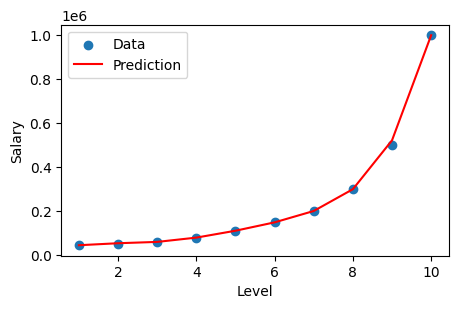

In [234]:
plt.figure(figsize=[5,3])
plt.scatter(dataset["Level"],dataset["Salary"])
plt.plot(dataset["Level"],prediction,c="red")
plt.legend(["Data","Prediction"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [235]:
# test-1
test_1 = pf.transform([[1]])
test_1

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1., 1., 1., 1., 1., 1.]])

In [236]:
lr.predict(test_1)

array([[44998.85621533]])

In [237]:
# test-2
test_2 = pf.transform([[5]])
test_2

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02, 3.125e+03]])

In [238]:
lr.predict(test_2)

array([[110882.13726558]])

In [239]:
# test-3
test_3 = pf.transform([[9]])
test_3

C:\Users\My\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04]])

In [240]:
lr.predict(test_3)

array([[522021.22443267]])